In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("..\archive\'Heart Attack.csv'")

In [3]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


# Sobre o dataset

## Colunas

O dataset selecionado está relacionado a ataques cardíacos, e a escolha se deve ao fato de que ele possui colunas inicialmente complexas, o que requer um entendimento de dados e conhecimento básico na área médica para sua análise.

```age = Idade
gender =  Genero
    0 Para mulher , 1 para homem
impluse = Frequência cardíaca (impulso)
pressurehight = Systolic BP (pressão alta)
pressurelow = Diastolic BP (pressão baixa)
glucose = Glicose
kcm = *¹Reatine kinase-myocardial band
troponin = *²Troponina
class
```
*¹ https://my.clevelandclinic.org/health/diagnostics/24519-ck-mb-test
*² https://medlineplus.gov/lab-tests/troponin-test/#:~:text=Troponin%20is%20a%20type%20of,are%20released%20in%20the%20blood.

# Explorando o dataset


In [5]:
df.columns #Mostrando as colunas

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [ ]:
df.info() # Mostrando o tipo de cada coluna

In [ ]:
df.describe() #Mostrando uma descrição de cada coluna. valores maximos e minimos, media, total

In [ ]:
df.isnull().sum() # Contando quantos nulos existem

# Preparando os dados


In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Trasnfomando os dados categoricos em numeros
le = preprocessing.LabelEncoder()
df['class']= le.fit_transform(df['class'])
df

In [15]:
#Normalização dos dados

df_normalizacao = df

scaler = MinMaxScaler()

df_normalizacao[
    ['age',
     'gender',
     'impluse',
     'pressurehight',
     'pressurelow',
     'glucose',
     'kcm',
     'troponin',
     'class']] = scaler.fit_transform(df_normalizacao[
          ['age',
           'gender',
           'impluse',
           'pressurehight',
           'pressurelow',
           'glucose',
           'kcm',
           'troponin',
           'class']])
df_normalizacao

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.561798,1.0,0.042163,0.651934,0.387931,0.247036,0.004935,0.001068,0.0
1,0.078652,1.0,0.067828,0.309392,0.068966,0.515810,0.021453,0.102826,1.0
2,0.460674,1.0,0.040330,0.651934,0.336207,0.464427,0.005569,0.000194,0.0
3,0.561798,1.0,0.045830,0.430939,0.146552,0.464427,0.045212,0.011749,1.0
4,0.460674,1.0,0.040330,0.386740,0.232759,0.523715,0.002533,0.000194,0.0
...,...,...,...,...,...,...,...,...,...
1314,0.337079,1.0,0.067828,0.441989,0.250000,0.333992,0.004368,0.000485,0.0
1315,0.584270,1.0,0.058662,0.458564,0.146552,0.225296,0.003367,0.016604,1.0
1316,0.348315,1.0,0.059578,0.696133,0.568966,0.120553,0.003067,0.412564,1.0
1317,0.449438,1.0,0.034830,0.414365,0.258621,0.806324,0.018283,0.034761,1.0


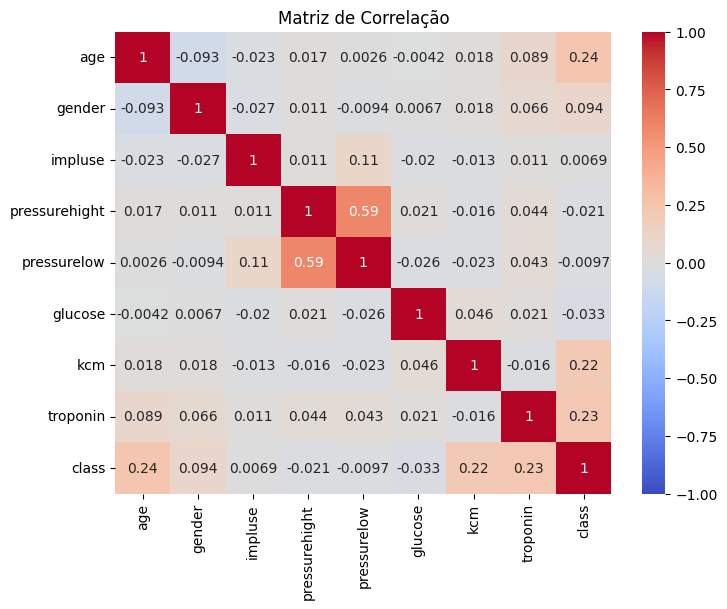

In [21]:
correlation_matrix = df_normalizacao.corr()

# Crie um mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

# Modelos

In [ ]:
!pip3 install pycaret[full]


In [28]:
from pycaret.classification import *
from pycaret.datasets import get_data

In [35]:
data = df_normalizacao
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.561798,1.0,0.042163,0.651934,0.387931,0.247036,0.004935,0.001068,0.0
1,0.078652,1.0,0.067828,0.309392,0.068966,0.515810,0.021453,0.102826,1.0
2,0.460674,1.0,0.040330,0.651934,0.336207,0.464427,0.005569,0.000194,0.0
3,0.561798,1.0,0.045830,0.430939,0.146552,0.464427,0.045212,0.011749,1.0
4,0.460674,1.0,0.040330,0.386740,0.232759,0.523715,0.002533,0.000194,0.0
...,...,...,...,...,...,...,...,...,...
1314,0.337079,1.0,0.067828,0.441989,0.250000,0.333992,0.004368,0.000485,0.0
1315,0.584270,1.0,0.058662,0.458564,0.146552,0.225296,0.003367,0.016604,1.0
1316,0.348315,1.0,0.059578,0.696133,0.568966,0.120553,0.003067,0.412564,1.0
1317,0.449438,1.0,0.034830,0.414365,0.258621,0.806324,0.018283,0.034761,1.0


In [37]:
setup(data=data, target='class')



,Description,Value
0,Session id,7050
1,Target,class
2,Target type,Binary
3,Original data shape,"(1319, 9)"
4,Transformed data shape,"(1319, 9)"
5,Transformed train set shape,"(923, 9)"
6,Transformed test set shape,"(396, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [38]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9881,0.9925,0.9894,0.9912,0.9903,0.9749,0.9750,1.6960
gbc,Gradient Boosting Classifier,0.9859,0.9914,0.9859,0.9912,0.9885,0.9704,0.9706,0.1260
lightgbm,Light Gradient Boosting Machine,0.9859,0.9945,0.9859,0.9912,0.9885,0.9704,0.9707,0.6890
xgboost,Extreme Gradient Boosting,0.9848,0.9924,0.9859,0.9894,0.9876,0.9681,0.9683,0.0620
rf,Random Forest Classifier,0.9816,0.9962,0.9789,0.9911,0.9848,0.9614,0.9619,0.2990
ada,Ada Boost Classifier,0.9805,0.9881,0.9771,0.9912,0.9840,0.9591,0.9596,0.0970
dt,Decision Tree Classifier,0.9783,0.9772,0.9824,0.9824,0.9823,0.9544,0.9545,0.0420
et,Extra Trees Classifier,0.9090,0.9661,0.9188,0.9336,0.9253,0.8087,0.8112,0.1510
lda,Linear Discriminant Analysis,0.6859,0.7536,0.8571,0.7007,0.7704,0.2876,0.3035,0.0230
lr,Logistic Regression,0.6782,0.7707,0.8940,0.6822,0.7733,0.2501,0.2811,0.5850


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

# Criando um modelo
<H3>Random Forest Classifier

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
# Separando os conjuntos de data e target
x = df_normalizacao[['age',
     'gender',
     'impluse',
     'pressurehight',
     'pressurelow',
     'glucose',
     'kcm',
     'troponin']]

y = df_normalizacao[['class']]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(
 x, y, test_size=0.33, random_state=42) #Definindo os x e y de traino e teste

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(883, 8)
(883, 1)
(436, 8)
(436, 1)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


In [54]:
rfc = RandomForestClassifier(max_depth=2) #Criando um classificador

rfc.fit(x_train, y_train) #treinando o modelo

y_pred = rfc.predict(x_test)




In [56]:
print("Acuracia"," ", metrics.accuracy_score(y_test, y_pred) )

Acuracia   0.9747706422018348


In [59]:
import pickle

In [60]:
pickle.dump(rfc, open('modelo.pkl', 'wb'))

In [62]:
create_api(rfc , 'python_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python python_api.py


In [63]:
!python python_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [58950]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Finished server process [58950]
ERROR:    Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 686, in lifespan
    await receive()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/lifespan/on.py", line 137, in receive
    return await self.receive_queue.get()
  File "/usr/lib/python3.10/asyncio/queues.py", line 159, in get
    await getter
asyncio.exceptions.CancelledError

